Les résultats des pentes ont été sauvegardés dans 'slope.txt'


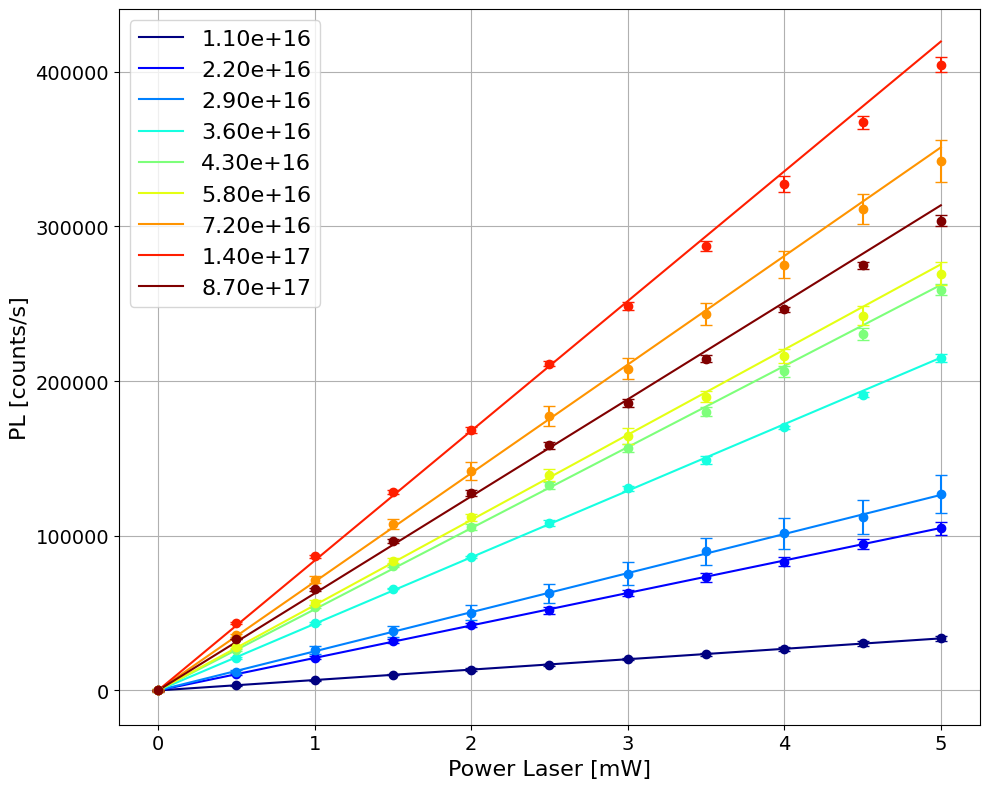

Graphique sauvegardé sous : Pl_vs_Power_graph.png


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os

def droite(x, a):
    return a * x


fichiers = ["3_1.1e16.ods","4_2.2e16.ods","5_2.9e16.ods","6_3.6e16.ods","7_4.3e16.ods","8_5.8e16.ods","9_7.2e16.ods","10H_1.4e17.ods","60H_8.7e17.ods"]
plt.figure(figsize=(10, 8))

#Degradé de couleurs
colors = plt.cm.jet(np.linspace(0, 1, len(fichiers)))

for i,fichier in enumerate (fichiers):
  df = pd.read_excel(fichier)
  sample = os.path.splitext(os.path.basename(fichier))[0]
  color = colors[i]


  x = df["Laser Power mW"].values
  y = df["mean_pl"].values
  incertitude = df["ecartype"].values
  x = np.insert(x, 0, 0)  # Ajoute 0 au début de x
  y = np.insert(y, 0, 0)  # Ajoute 0 au début de y
  incertitude = np.insert(incertitude, 0, incertitude[0])

  params, cov = curve_fit(droite, x, y, sigma=incertitude, absolute_sigma=True)
  a = params[0]
  incert_a = np.sqrt(cov[0, 0])


  x_fit = np.linspace(min(x), max(x), 100)
  y_fit = droite(x_fit, a)

  concentration_str = sample.split("_")[1]
  concentration = float(concentration_str)



  line, = plt.plot(x_fit, y_fit, label=f"{concentration:.2e}",color=color)

  plt.errorbar(x, y, yerr=incertitude, fmt='o', capsize=4, color=color)
  plt.xlabel("Power Laser [mW]",fontsize=16)
  plt.ylabel("PL [counts/s]",fontsize=16)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.legend(fontsize=16)
  plt.grid(True)
  plt.tight_layout()

  output_file = f"slope.txt"

  # Vérifier si le fichier existe déjà et ouvrir en mode ajout
  if os.path.exists(output_file):
      mode = 'a'  # Ajout à la fin du fichier
  else:
      mode = 'w'  # Création d'un nouveau fichier

  # Ouvrir le fichier en mode approprié
  with open(output_file, mode) as file:
      # Si c'est un nouveau fichier, écrire l'entête
      if mode == 'w':
          file.write("Sample\tSlope\tIncertitude_Pente\n")

      # Ajouter les résultats sous forme de ligne
      file.write(f"{sample}\t{a:.4f}\t{incert_a:.4f}\n")

print(f"Les résultats des pentes ont été sauvegardés dans '{output_file}'")

graphique_sortie = f"Pl_vs_Power_graph.png"

plt.savefig(graphique_sortie, dpi=300)

plt.show()
print(f"Graphique sauvegardé sous : {graphique_sortie}")

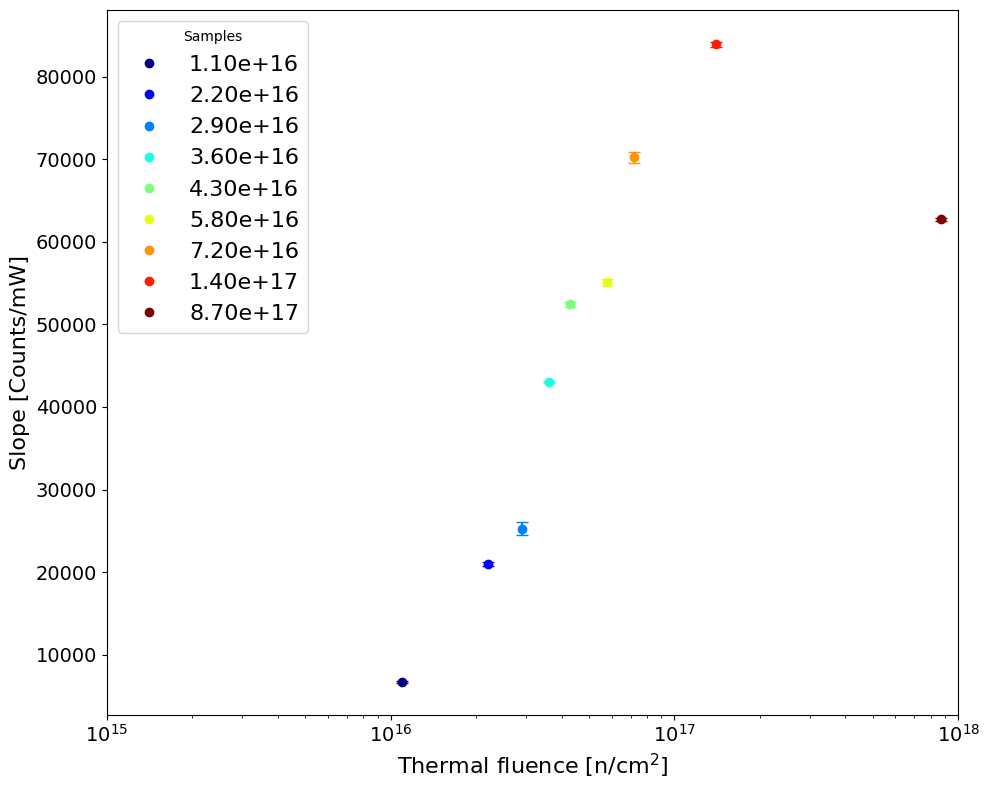

In [ ]:
#Code slope

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


df = pd.read_csv("slope.txt", sep="\t")
df["Thermal Fluence (n/cm2)"] = df["Sample"].str.split("_").str[1].astype(float)


incertitude_pente = df["Incertitude_Pente"]
x = df["Thermal Fluence (n/cm2)"].values
y = df["Slope"].values

# Créer une palette de couleurs (par exemple, 10 couleurs distinctes)
colors = plt.cm.jet(np.linspace(0, 1, len(df)))

# Créer un dictionnaire pour les légendes
handles = []

plt.figure(figsize=(10, 8))

for xi, yi,ei, color in zip(x, y,incertitude_pente, colors):
    # Utiliser scatter pour dessiner chaque point avec sa propre couleur
    eb=plt.errorbar(xi, yi, yerr=ei, fmt='o', color=color, capsize=4)

    # Créer un handle de légende pour chaque point (sample)
    handles.append(eb[0])

# Ajouter la légende avec les points colorés
labels = ['{:.2e}'.format(val) for val in x]
plt.legend(handles=handles, labels=labels, title="Samples", fontsize=16)

# Ajouter les configurations des axes et du graphique
plt.xscale('log')
plt.xlim(1e15, 1e18)
plt.xlabel("Thermal fluence [n/cm$^{2}$]",fontsize=16)
plt.ylabel("Slope [Counts/mW]",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Sauvegarder le graphique
graph_sortie = f"Slope_vs_ThermalFluence.png"
plt.tight_layout()
plt.savefig(graph_sortie, dpi=300)
plt.show()
